In [1]:
import numpy as np
import pandas as pd

In [2]:
rw = pd.read_csv('../03.분류/data/winequality-red.csv')
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(rw.shape)
print(rw.quality.value_counts())

(1599, 12)
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [6]:
# 결측치 체크 
rw.isna().sum().sum()

0

In [7]:
X = rw.iloc[:, :-1].values
y = rw['quality'].values

In [8]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(X_std)

In [10]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=6, random_state=2023, n_init='auto')
kmeans.fit(X_std)

c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=6, n_init='auto', random_state=2023)

In [11]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([195, 287, 339,  28, 237, 513], dtype=int64))

In [15]:
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['target'] = rw['quality'].values
df['cluster'] = kmeans.labels_
df.tail()

,PC1,PC2,target,cluster
1594,-2.150500,0.814286,5,0
1595,-2.214496,0.893101,6,0
1596,-1.456129,0.311746,6,0
1597,-2.270518,0.979791,5,0
1598,-0.426975,-0.536690,6,4


In [13]:
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
3      1          2
       2          1
       5          7
4      0         10
       1          5
       2          5
       3          1
       4          2
       5         30
5      0         39
       1         88
       2        228
       3         17
       4         22
       5        287
6      0        115
       1        132
       2         94
       3          9
       4        117
       5        171
7      0         27
       1         55
       2         11
       3          1
       4         87
       5         18
8      0          4
       1          5
       4          9

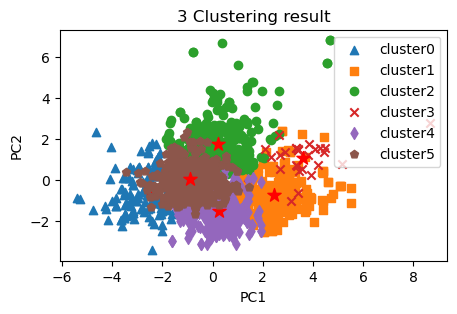

In [27]:
import matplotlib.pyplot as plt
markers = ['^', 's', 'o', 'x', 'd', 'p']    # clust개수랑 맞춰야함

plt.figure(figsize=(5,3))
for i , marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title("3 Clustering result")    
plt.show()

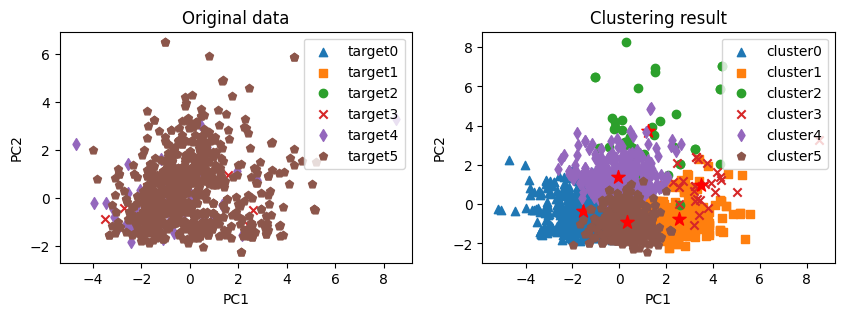

In [14]:
plt.figure(figsize=(10,3))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1) #  subplot 함수는 그림의 행(row), 열(column), 현재 서브플롯의 인덱스(index)를 지정
    for i , marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label='target'+str(i))
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
            
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")    
    else:
        plt.title("Clustering result")    
plt.show()

In [22]:
# Good / Poor 2진 등급으로 분류
rw['target'] = rw.quality.apply(lambda x: 1 if x >= 6 else 0)
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5,0


In [23]:
kmeans2 = KMeans(n_clusters=2, random_state=2023, n_init='auto')
kmeans2.fit(X_std)

c:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=2023)

In [24]:
df2 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df2['target'] = rw['target'].values
df2['cluster'] = kmeans2.labels_
df2.tail()

,PC1,PC2,target,cluster
1594,-2.150500,0.814286,0,0
1595,-2.214496,0.893101,1,0
1596,-1.456129,0.311746,1,0
1597,-2.270518,0.979791,0,0
1598,-0.426975,-0.536690,1,0


In [25]:
rw['cluster'] = kmeans2.labels_
rw.groupby(['quality','cluster'])[['alcohol']].count()

alcohol
quality cluster         
3       0              7
        1              3
4       0             42
        1             11
5       0            469
        1            212
6       0            371
        1            267
7       0             62
        1            137
8       0              7
        1             11

In [18]:
# dataframe 
# df 컬럼 a,b,c 
# feature = 'a'
# df.a 
# df.b
# df.c 는 가능이나
# df.feature 는 불가능
# df[feature]

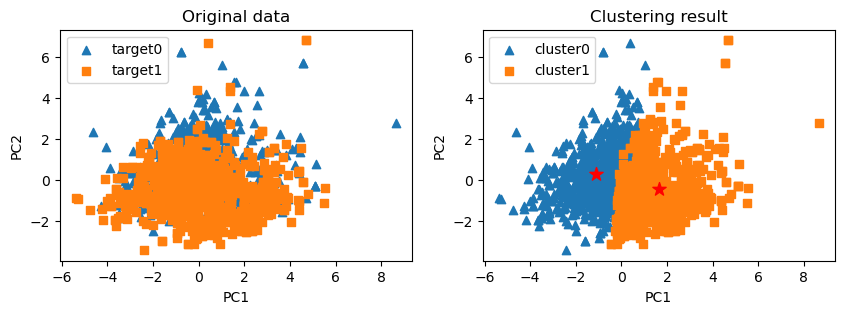

In [28]:
markers = ['^', 's']  
plt.figure(figsize=(10,3))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1) #  subplot 함수는 그림의 행(row), 열(column), 현재 서브플롯의 인덱스(index)를 지정
    for i , marker in enumerate(markers):
        x_data = df2[df2[column] == i]['PC1']
        y_data = df2[df2[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label='target'+str(i))
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)
            
    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")    
    else:
        plt.title("Clustering result")    
plt.show()

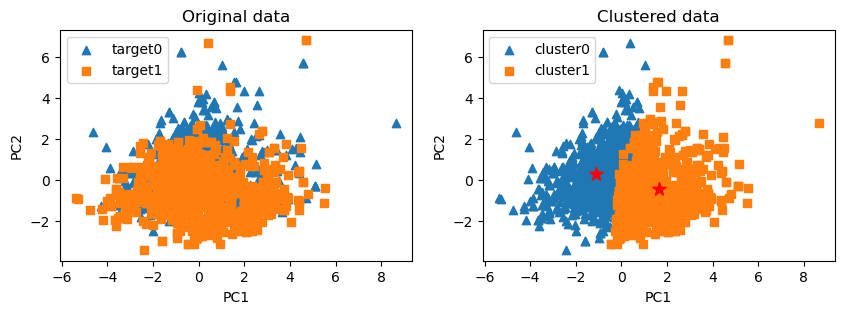

In [29]:
# 이중 for문 풀은것
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1) #  subplot 함수는 그림의 행(row), 열(column), 현재 서브플롯의 인덱스(index)를 지정
markers = ['^', 's']  
for i , marker in enumerate(markers):
    x_data = df2[df2['target'] == i]['PC1']
    y_data = df2[df2['target'] == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='target'+str(i))       
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title("Original data")

plt.subplot(1, 2, 2) #  1행 2열의 그리드에서 두 번째(오른쪽) 위치에 생성
for i , marker in enumerate(markers):
    x_data = df2[df2['cluster'] == i]['PC1']
    y_data = df2[df2['cluster'] == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)       
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title("Clustered data")

plt.show()

Text(0.5, 1.0, 'Clustered data')

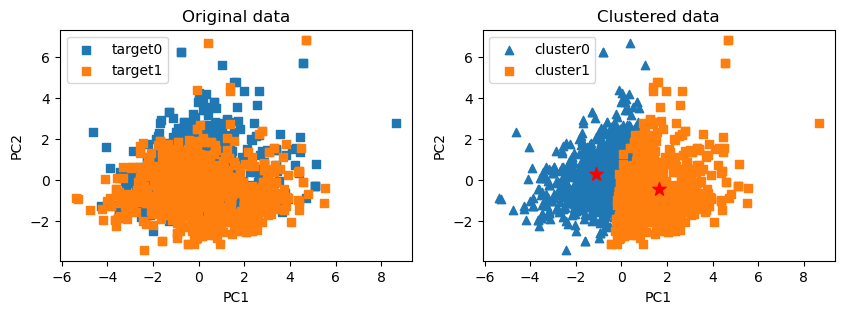

In [30]:
# marker for문 풀은것
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
markers = ['^', 's']  
for i in range(len(markers)):
    maker = markers[i]
    x_data = df2[df2['target'] == i]['PC1']
    y_data = df2[df2['target'] == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='target'+str(i))
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title("Original data")

plt.subplot(1, 2, 2)
for i in range(len(markers)):
    marker = markers[i]
    x_data = df2[df2['cluster'] == i]['PC1']
    y_data = df2[df2['cluster'] == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
    # 새로운 산점도 별 추가 
    plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100) # s=size100
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title("Clustered data")

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X_std, kmeans2.labels_)

0.2068046222150101

In [32]:
sil_samples2 = silhouette_samples(X_std, kmeans2.labels_)
rw['cluster'] = kmeans2.labels_
rw['실루엣 계수'] = sil_samples2
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,target,실루엣 계수
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,0.392464
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0,0.307586
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0,0.356208
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1,0.234043
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0,0.392464


In [33]:
rw.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.275069
1,0.104781


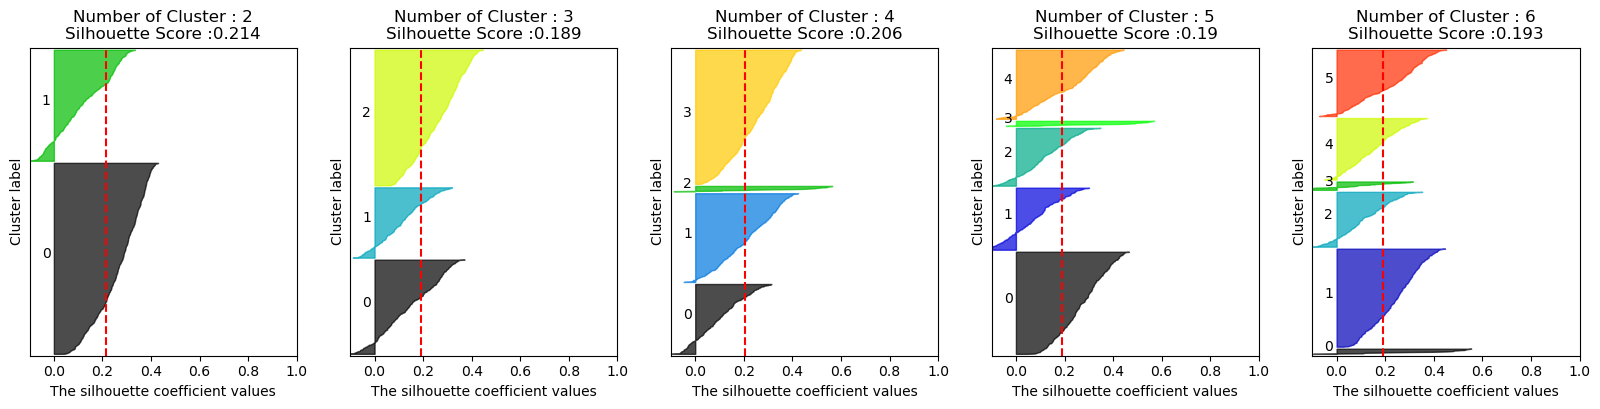

In [34]:
from visualize import visualize_silhouette 
import warnings
warnings.filterwarnings('ignore')
visualize_silhouette([2,3,4,5,6], X_std)